AUTOCORRELATION

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
#%matplotlib inline

In [4]:
df=pd.read_csv('/content/AirPassengers.csv',index_col='Month',parse_dates=True)
df

# Here month column is date type. We have made Month column as index column 
# and parse_dates=True tells python that Month is a date type column otherwise it will consider it as normal index.


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


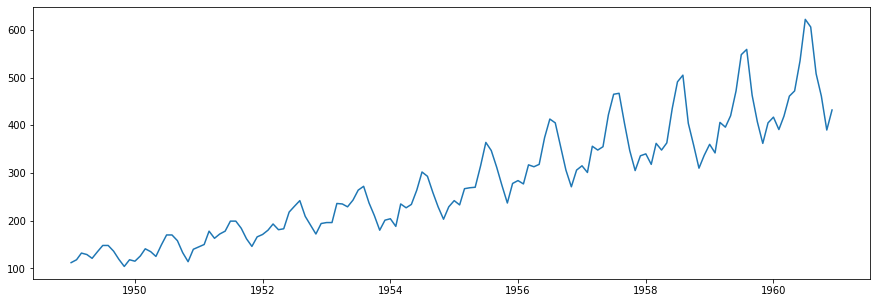

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df)
#trend=Linear upward, seasonality=multiplicative

In [7]:
#First-order difference: diff() - To convert non-stationary data to stationary.
# Stationary dataset: Mean, variance, std deviation is remaining constant throughout the years.
#But graph shows that magnitude of cycle in increasing every year. i.e. no. of passangers in that airline is increasing every year.
# So mean variance std deviance will also change.
# 99% times your Time series data will be non-stationary in nature.

df['Passengers_Diff']=df['Passengers'].diff(periods=1)
# In df dataset Month is index. So we have only one column Passengers. Make Passengers column as stationary. Add Passengers_Diff column.
#differencing takes interval of 1 step. For 1st record NAN will be there because before that no data is available. Next 118-112=6, 132-118=14 and so on
#After differencing if we plot it it will be stationary.
df

,Passengers,Passengers_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [8]:
df=df.dropna()
df

,Passengers,Passengers_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


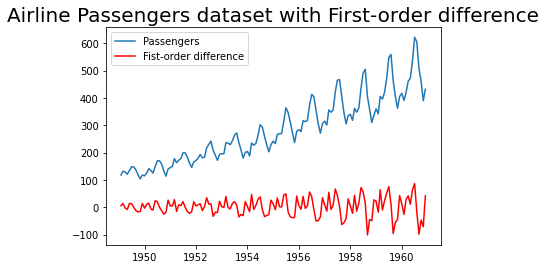

In [9]:
#plot
plt.title("Airline Passengers dataset with First-order difference", size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='Fist-order difference',color='red')
plt.legend()

In [11]:
# Calculate Autocorrelation
acf_values = acf(df['Passengers_Diff'])
np.round(acf_values,2)


# Prints autocorrelation of current data and all records i.e. 1-step lagged version, 2-step lagged version and so on.
# First value 1 represents autocorr. between current data and itself. so don't consider this.
# Highest is 12th period value: 0.83 i.e. 83%. It tells us a value 12 periods ago has a strong impact on the value today.


array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

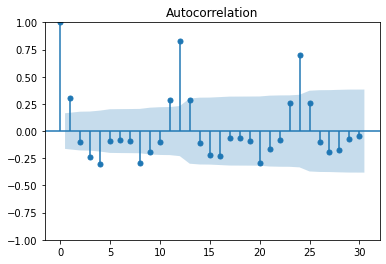

In [12]:
# Plot ACF
plot_acf(df['Passengers_Diff'], lags=30);
# Blue shaded region is +-2 std error region. Anything within this region is non-significant
# Yt-12 and current data has very high autocorrelation(0.83). Same trend can be seen after every one year.
# So use Yt-12 and Yt-24 for model building as they are having very stron autocorrelation.

Partial Autocorrelation Function

In [13]:
# Calculate PACF
pacf_values = pacf(df['Passengers_Diff'])
np.round(pacf_values,2)
# The correlation value at lag 12 has dropped to 0.61, indicating the direct relationship ia a bit weaker.

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


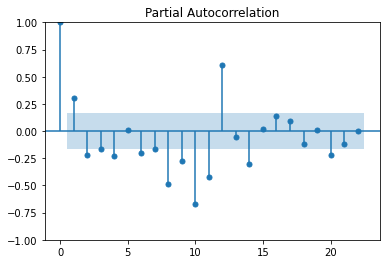

In [14]:
# Plot PACF
plot_pacf(df['Passengers_Diff']);
